In [1]:
import os
os.chdir('..')

from util import CONFIG
CONFIG.set_use_mpl_tables(True)

## Section 4.2

#### Section 4.2.1

In [2]:
from math import sqrt, cos, sin

[p0, p1, p2, p3] = [1, 0, 0, 0]
[theta0, theta1, theta2, theta3] = [0, 0, 0, 0]

state = [sqrt(p0) * (cos(theta0) + 1j * sin(theta0)),
         sqrt(p1) * (cos(theta1) + 1j * sin(theta1)),
         sqrt(p2) * (cos(theta2) + 1j * sin(theta2)),
         sqrt(p3) * (cos(theta3) + 1j * sin(theta3))]

In [3]:
import random
from math import pi

random.seed(123456789) # <1>

probs = [random.random() for _ in range(4)] # <2>
total = sum(probs)
probs = [p/total for p in probs] # <3>

angles = [random.uniform(0, 2*pi) for _ in range(4)] # <4>

state = [sqrt(p)*(cos(a) + 1j*sin(a)) for (p, a) in zip(probs, angles)] # <5>

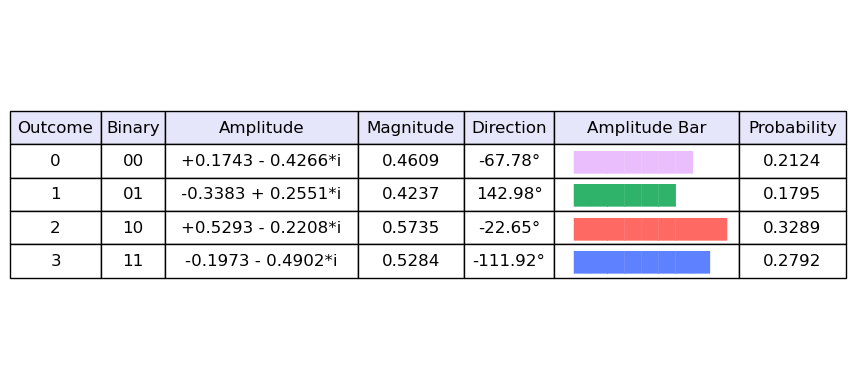

In [4]:
from util import show_state_table

show_state_table(state)

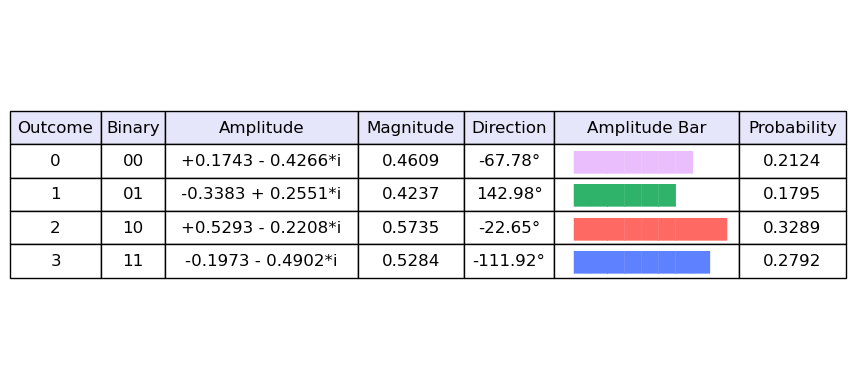

In [5]:
from util import show_state_table

show_state_table(state)

In [6]:
def cis(theta):
    return cos(theta) + 1j*sin(theta)

In [7]:
p = 0.75
theta0 = 0
theta1 = 60/(180/pi) # <1>
first_state = [sqrt(p)*cis(theta0), sqrt(1-p)*cis(theta1)]
[round(amp.real, 5)+1j*round(amp.imag, 5) for amp in first_state]

[(0.86603+0j), (0.25+0.43301j)]

In [8]:
q = 0.5
phi0 = 0
phi1 = -120/(180/pi)
second_state = [sqrt(q)*cis(phi0), sqrt(1-q)*cis(phi1)]
[round(amp.real, 5)+1j*round(amp.imag, 5) for amp in second_state]
[(0.70711+0j), (-0.35355-0.61237j)]

[(0.70711+0j), (-0.35355-0.61237j)]

In [9]:
new_state = [sqrt(p*q)*cis(theta0 + phi0),
                sqrt(p*(1-q))*cis(theta0 + phi1),
                sqrt((1-p)*q)*cis(theta1 + phi0),
                sqrt((1-p)*(1-q))*cis(theta1 + phi1)]

In [10]:
new_state = [first_state[0]*second_state[0], first_state[0]*second_state[1],
             first_state[1]*second_state[0], first_state[1]*second_state[1]]
[round(amp.real, 5)+1j*round(amp.imag, 5) for amp in new_state]

[(0.61237+0j), (-0.30619-0.53033j), (0.17678+0.30619j), (0.17678-0.30619j)]

In [11]:
new_state = [sqrt(p*q)*cis(theta0 + phi0), sqrt(p*(1-q))*cis(theta0 + phi1),
            sqrt((1-p)*q)*cis(theta1 + phi0), sqrt((1-p)*(1-q))*cis(theta1 + phi1)]
[round(amp.real, 5)+1j*round(amp.imag, 5) for amp in new_state]

[(0.61237+0j), (-0.30619-0.53033j), (0.17678+0.30619j), (0.17678-0.30619j)]

In [12]:
bell_state1 = [sqrt(0.5), 0.0, 0.0, sqrt(0.5)]

bell_state2 = [sqrt(0.5), 0.0, 0.0, -sqrt(0.5)]

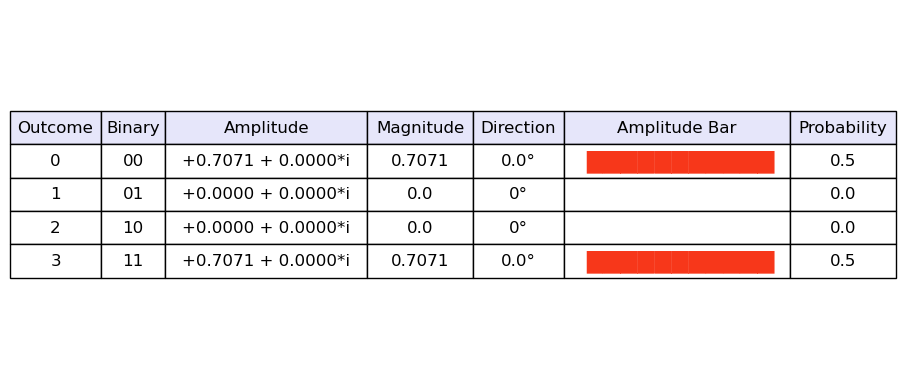

In [13]:
show_state_table(bell_state1)

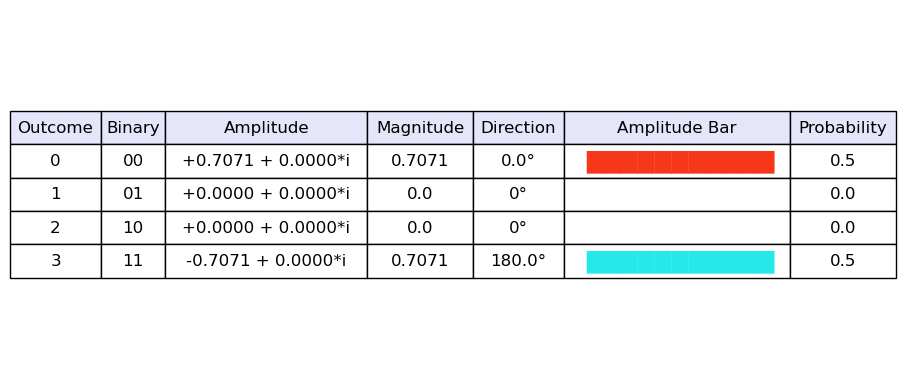

In [14]:
show_state_table(bell_state2)

In [15]:
bell_state3 = [0.0, sqrt(0.5), sqrt(0.5), 0.0]

bell_state4 = [0.0, sqrt(0.5), -sqrt(0.5), 0.0]

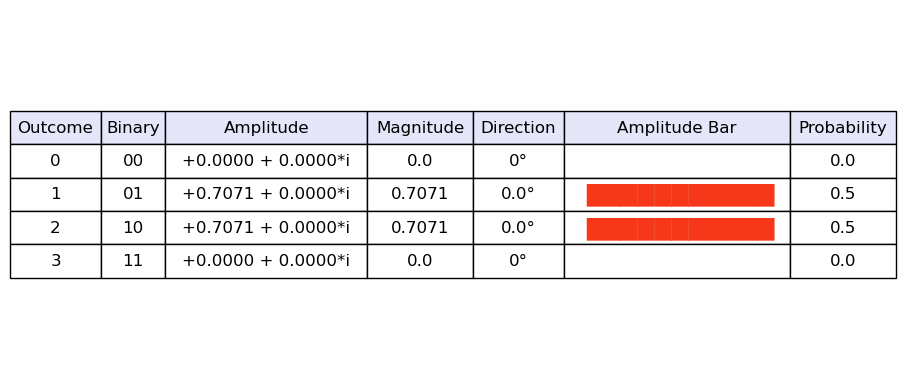

In [16]:
show_state_table(bell_state3)

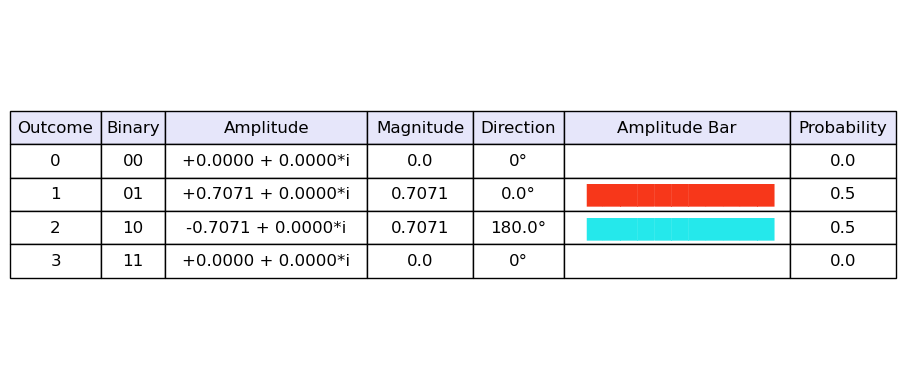

In [17]:
show_state_table(bell_state4)

#### Section 4.2.2

In [18]:
state_list = [(0.09858+0.03637j), (0.07478+0.06912j), (0.04852+0.10526j),
         (0.00641+0.16322j), (-0.12895+0.34953j), (0.58403-0.6318j),
         (0.18795-0.08665j), (0.12867-0.00506j)]

Listing 4.1

In [19]:
from math import log2, ceil, floor
from util import is_close

def is_power_of_two(m):
    return ceil(log2(m)) == floor(log2(m))

def prepare_state(*a):
    state = [a[k] for k in range(len(a))]
    assert (is_power_of_two(len(state)))  # <1>
    assert (is_close(sum([abs(state[k]) ** 2 for k in range(len(state))]), 1.0))  # <2>
    return state  # <3>

In [20]:
state = prepare_state(*state_list)

In [21]:
[[k, state[k]] for k in range(len(state))]

[[0, (0.09858+0.03637j)],
 [1, (0.07478+0.06912j)],
 [2, (0.04852+0.10526j)],
 [3, (0.00641+0.16322j)],
 [4, (-0.12895+0.34953j)],
 [5, (0.58403-0.6318j)],
 [6, (0.18795-0.08665j)],
 [7, (0.12867-0.00506j)]]

In [22]:
from math import atan2

table1 = [
    [k, round(atan2(state[k].imag, state[k].real) / (2 * pi) * 360, 5),
     round(abs(state[k]) ** 2, 5)] for k in range(len(state))]
for row in table1:
    print(row)

[0, 20.25098, 0.01104]
[1, 42.74755, 0.01037]
[2, 65.25248, 0.01343]
[3, 87.75103, 0.02668]
[4, 110.25023, 0.1388]
[5, -47.25, 0.74026]
[6, -24.75097, 0.04283]
[7, -2.25202, 0.01658]


In [23]:
expanded_table = [[k, state[k], round(
    atan2(state[k].imag, state[k].real) / (2 * pi) * 360, 5),
                   round(abs(state[k]), 5), round(abs(state[k]) ** 2, 5)]
                  for k in range(len(state))]
for row in expanded_table:
    print(row)

[0, (0.09858+0.03637j), 20.25098, 0.10508, 0.01104]
[1, (0.07478+0.06912j), 42.74755, 0.10183, 0.01037]
[2, (0.04852+0.10526j), 65.25248, 0.1159, 0.01343]
[3, (0.00641+0.16322j), 87.75103, 0.16335, 0.02668]
[4, (-0.12895+0.34953j), 110.25023, 0.37256, 0.1388]
[5, (0.58403-0.6318j), -47.25, 0.86038, 0.74026]
[6, (0.18795-0.08665j), -24.75097, 0.20696, 0.04283]
[7, (0.12867-0.00506j), -2.25202, 0.12877, 0.01658]


In [24]:
table2 = [[row[0], (
            round(sqrt(row[2]) * cos(row[1] / (180 / pi)), 5) + round(
        sqrt(row[2]) * sin(row[1] / (180 / pi)), 5) * 1j)] for row in
          table1]
for row in table2:
    print(row)

[0, (0.09858+0.03637j)]
[1, (0.07478+0.06912j)]
[2, (0.04851+0.10524j)]
[3, (0.00641+0.16321j)]
[4, (-0.12895+0.34953j)]
[5, (0.58403-0.6318j)]
[6, (0.18794-0.08665j)]
[7, (0.12866-0.00506j)]


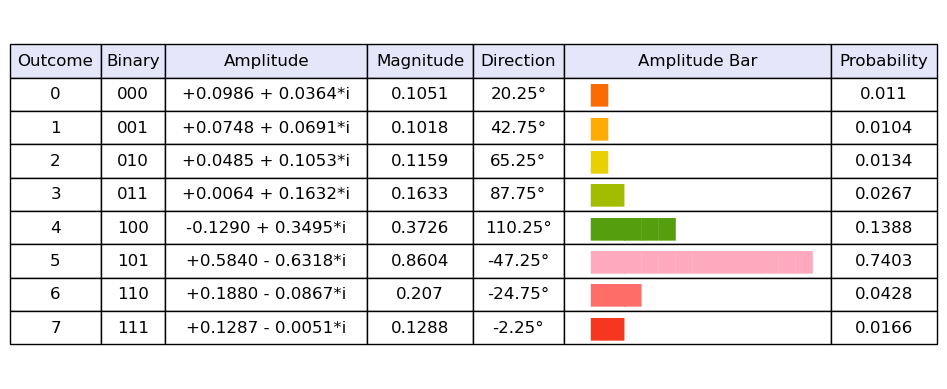

In [25]:
show_state_table(state)

#### Section 4.2.3

Listing 4.2

In [26]:
def init_state(n):
    state = [0 for _ in range(2 ** n)] # <1>
    state[0] = 1 # <2>
    return state

In [27]:
state = init_state(2)
state

[1, 0, 0, 0]

## Section 4.3

#### Section 4.3.2

Listing 4.3

In [28]:
def is_bit_set(m, k):
    return m & (1 << k)

def pair_generator_check_digit(n, t):
    distance = int(2 ** t) # <1>

    for k0 in range(2**n): # <2>
        if not is_bit_set(k0, t): # <3>
            k1 = k0 + distance # <4>
            yield k0, k1

In [29]:
for (k0, k1) in pair_generator_check_digit(3, 0):
    print(k0, k1)

0 1
2 3
4 5
6 7


Listing 4.4

In [30]:
def pair_generator_pattern(n, t):
    distance = int(2 ** t) # <1>

    for j in range(2**(n-t-1)):
        for k0 in range(2*j*distance, (2*j+1)*distance): # <2>
            k1 = k0 + distance # <3>
            yield k0, k1

In [31]:
for (k0, k1) in pair_generator_pattern(3, 0):
    print(k0, k1)

0 1
2 3
4 5
6 7


Listing 4.5

In [32]:
def pair_generator_concatenate(n, t):
    distance = int(2 ** t) # <1>
    suffix_count = int(2 ** t) # <2>
    prefix_count = int(2 ** (n - t - 1)) # <2>

    for p in range(prefix_count): # <3>
        for s in range(suffix_count):
            k0 = p * suffix_count*2 + s
            k1 = k0 + distance
            yield k0, k1

In [33]:
for (k0, k1) in pair_generator_concatenate(4, 1):
    print(k0, k1)

0 2
1 3
4 6
5 7
8 10
9 11
12 14
13 15


#### Section 4.3.3

Listing 4.6

In [34]:
def process_pair(state, gate, k0, k1):
    x = state[k0] # <1>
    y = state[k1] # <1>
    state[k0] = x * gate[0][0] + y * gate[0][1] # <2>
    state[k1] = x * gate[1][0] + y * gate[1][1] # <2>

def transform(state, t, gate):
    n = int(log2(len(state))) # <3>
    for (k0, k1) in pair_generator(n, t): # <4>
        process_pair(state, gate, k0, k1) # <5>

In [35]:
pair_generator = pair_generator_concatenate

In [36]:
state = [(0.09858+0.03637j), (0.07478+0.06912j), (0.04852+0.10526j),
         (0.00641+0.16322j), (-0.12895+0.34953j), (0.58403-0.6318j),
         (0.18795-0.08665j), (0.12867-0.00506j)]

In [37]:
from sim_gates import *

transform(state, 0, x)
state

[(0.07478+0.06912j),
 (0.09858+0.03637j),
 (0.00641+0.16322j),
 (0.04852+0.10526j),
 (0.58403-0.6318j),
 (-0.12895+0.34953j),
 (0.12867-0.00506j),
 (0.18795-0.08665j)]

#### Section 4.3.4

In [38]:
state = init_state(3)

In [39]:
state

[1, 0, 0, 0, 0, 0, 0, 0]

In [40]:
transform(state, 0, h)
state

[0.7071067811865475, 0.7071067811865475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [41]:
state = init_state(3)
transform(state, 1, h)
state

[0.7071067811865475, 0.0, 0.7071067811865475, 0.0, 0.0, 0.0, 0.0, 0.0]

In [42]:
state = init_state(3)
transform(state, 0, h)
transform(state, 1, h)
transform(state, 2, h)
state

[0.3535533905932737,
 0.3535533905932737,
 0.3535533905932737,
 0.3535533905932737,
 0.3535533905932737,
 0.3535533905932737,
 0.3535533905932737,
 0.3535533905932737]

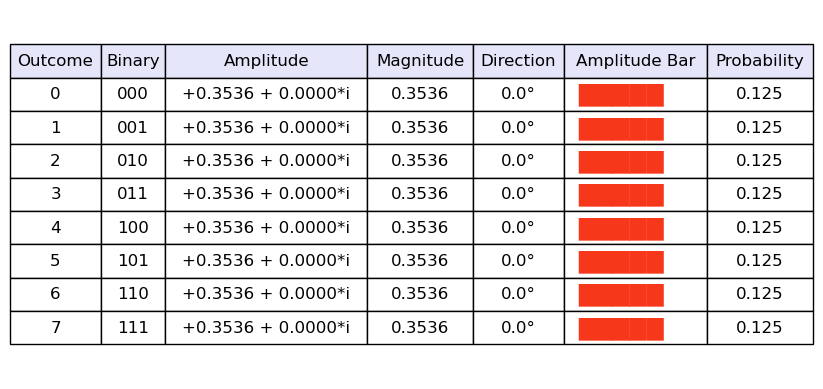

In [43]:
show_state_table(state)

## Section 4.4

#### Section 4.4.1

Listing 4.7

In [44]:
from math import log2

def c_transform(state, c, t, gate): # <1>
    n = int(log2(len(state)))
    for (k0, k1) in filter(lambda p: is_bit_set(p[0], c), pair_generator(n, t)): # <2>
        process_pair(state, gate, k0, k1) # <3>

In [45]:
state = [(0.09858+0.03637j), (0.07478+0.06912j), (0.04852+0.10526j),
         (0.00641+0.16322j), (-0.12895+0.34953j), (0.58403-0.6318j),
         (0.18795-0.08665j), (0.12867-0.00506j)]

In [46]:
c_transform(state, 1, 2, x)
state

[(0.09858+0.03637j),
 (0.07478+0.06912j),
 (0.18795-0.08665j),
 (0.12867-0.00506j),
 (-0.12895+0.34953j),
 (0.58403-0.6318j),
 (0.04852+0.10526j),
 (0.00641+0.16322j)]

#### Section 4.4.2

Listing 4.8

In [47]:
from math import log2

def mc_transform(state, cs, t, gate):
    assert not t in cs # <1>
    n = int(log2(len(state)))
    for (k0, k1) in filter(lambda p: all([is_bit_set(p[0], c) for c in cs]), pair_generator(n, t)): # <2>
        process_pair(state, gate, k0, k1) # <3>

In [48]:
state = [(0.09858+0.03637j), (0.07478+0.06912j), (0.04852+0.10526j),
         (0.00641+0.16322j), (-0.12895+0.34953j), (0.58403-0.6318j),
         (0.18795-0.08665j), (0.12867-0.00506j)]

In [49]:
mc_transform(state, [1, 2], 0, x)
state

[(0.09858+0.03637j),
 (0.07478+0.06912j),
 (0.04852+0.10526j),
 (0.00641+0.16322j),
 (-0.12895+0.34953j),
 (0.58403-0.6318j),
 (0.12867-0.00506j),
 (0.18795-0.08665j)]

## Section 4.5

#### Section 4.5.1

Listing 4.9

In [50]:
from random import choices
from collections import Counter

def measure(state, shots):
    samples = choices(range(len(state)),
                      [abs(state[k]) ** 2 for k in range(len(state))],
                      k=shots)
    counts = {}
    for (k, v) in Counter(samples).items():
        counts[k] = v
    return counts

In [51]:
state = [(0.09858+0.03637j), (0.07478+0.06912j), (0.04852+0.10526j),
         (0.00641+0.16322j), (-0.12895+0.34953j), (0.58403-0.6318j),
         (0.18795-0.08665j), (0.12867-0.00506j)]

In [52]:
probabilities = [[k, abs(state[k])**2] for k in range(len(state))]
for i in probabilities:
    print("probability of outcome", i[0], ": ", round(i[1], 3))

probability of outcome 0 :  0.011
probability of outcome 1 :  0.01
probability of outcome 2 :  0.013
probability of outcome 3 :  0.027
probability of outcome 4 :  0.139
probability of outcome 5 :  0.74
probability of outcome 6 :  0.043
probability of outcome 7 :  0.017


In [53]:
samples = measure(state, 100)
samples

{5: 83, 2: 3, 4: 10, 3: 2, 1: 1, 6: 1}

#### Section 4.5.2

Listing 4.10

In [54]:
class QuantumRegister:
    def __init__(self, size, shift=0):
        self.size = size
        self.shift = shift

    def __getitem__(self, key):
        if isinstance(key, slice):
            return [self[ii] for ii in range(*key.indices(len(self)))]
        elif isinstance(key, int):
            if key < 0:
                key += len(self)
            assert(0 <= key < self.size)
            return self.shift + key

    def __len__(self):
        return self.size

    def __iter__(self):
        return list([self.shift + i for i in range(self.size)])

    def __reversed__(self):
        return list([self.shift + i for i in range(self.size)[::-1]])

Listing 4.11

In [55]:
class QuantumTransformation:
    def __init__(self, gate, target, controls=[], name=None, arg=None):
        self.gate = gate
        self.target= target
        self.controls = controls
        self.name = name
        self.arg = arg

Listing 4.12

In [56]:
class QuantumCircuit:
    def __init__(self, *args):
        bits = 0
        regs = []
        for register in args:
            register.shift = bits
            bits += register.size
            regs.append(register.size)

        self.state = init_state(bits)
        self.transformations = []
        self.regs = regs
        self.reports = {}

    def initialize(self, state):
        self.state = state

    def h(self, t):
        self.transformations.append(QuantumTransformation(h, t, [], 'h'))

    def x(self, t):
        self.transformations.append(QuantumTransformation(x, t, [], 'x'))

    def cx(self, c, t):
        self.transformations.append(QuantumTransformation(x, t, [c], 'cx'))

    def mcx(self, cs, t):
        self.transformations.append(QuantumTransformation(x, t, cs))

    def run(self):
        for tr in self.transformations:
            cs = tr.controls
            if len(cs) == 0:
                transform(self.state, tr.target, tr.gate)
            elif len(cs) == 1:
                c_transform(self.state, cs[0], tr.target, tr.gate)
            else:
                mc_transform(self.state, cs, tr.target, tr.gate)
        self.transformations = []
        return self.state

    def measure(self, shots):
        return measure(self.state, shots)

In [57]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)

qc.h(q[0])
qc.h(q[1])
qc.mcx([q[0], q[1]], q[2])

In [58]:
state = qc.run()

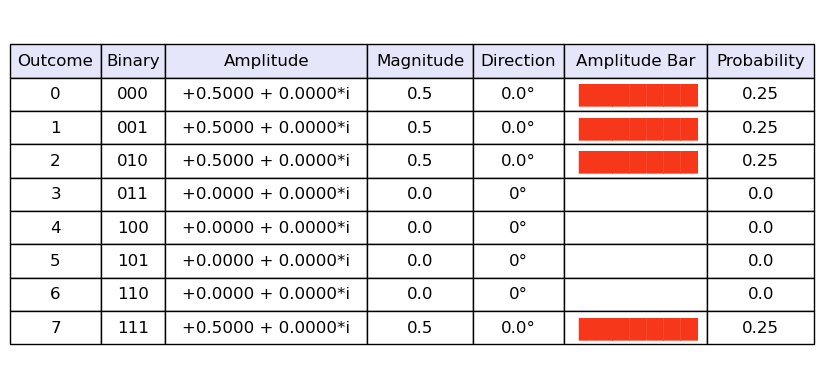

In [59]:
show_state_table(state)

In [60]:
samples = measure(state, 1000)
samples

{2: 245, 7: 238, 0: 267, 1: 250}

#### Section 4.5.3

In [61]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)

for i in range(len(q)):
    qc.h(q[i])

state = qc.run()

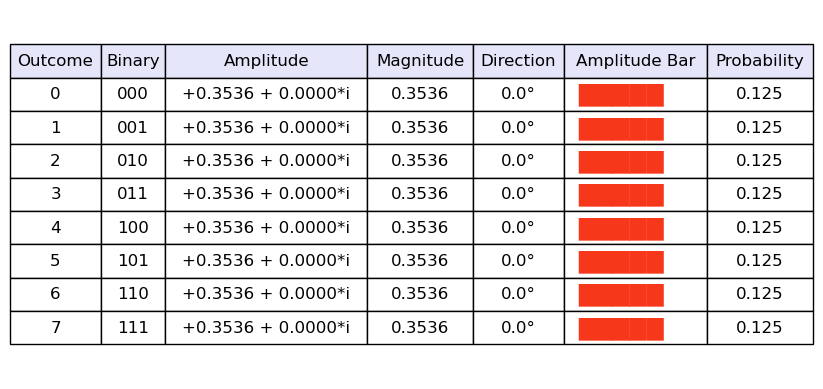

In [62]:
show_state_table(state)

Listing 4.13

In [63]:
def uniform(n):
    q = QuantumRegister(n)
    qc = QuantumCircuit(q)

    for i in range(len(q)):
        qc.h(q[i])

    return qc

#### Section 4.5.4

In [64]:
from sim_circuit import *

q = QuantumRegister(3)
qc = QuantumCircuit(q)

for i in range(len(q)):
    qc.ry(pi/3, q[i])

state = qc.run()

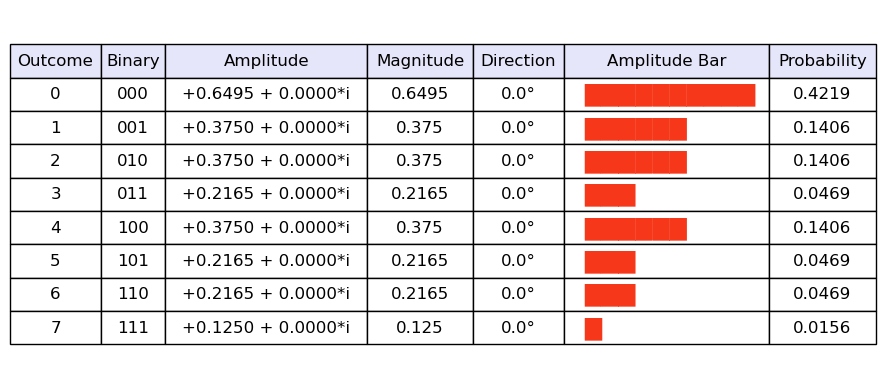

In [65]:
show_state_table(state)

Listing 4.14

In [66]:
def binomial(n, theta):
    q = QuantumRegister(n)
    qc = QuantumCircuit(q)

    for i in range(len(q)): # <1>
        qc.ry(theta, q[i])
    
    return qc

#### Section 4.5.5

In [67]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[0])
qc.cx(q[0], q[1])

state = qc.run()

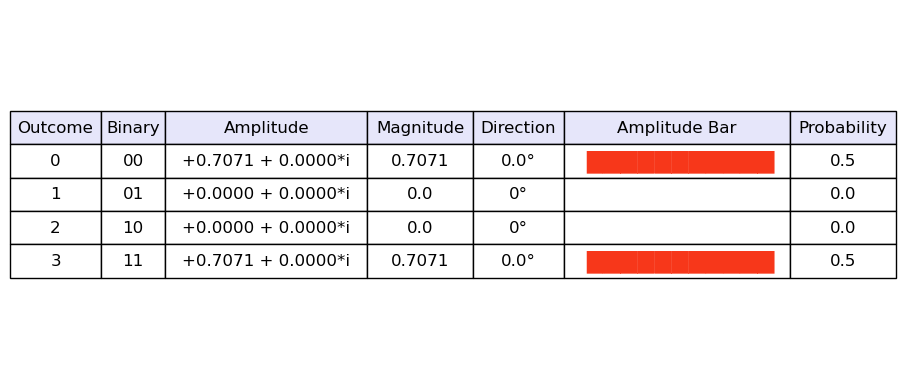

In [68]:
show_state_table(state)

In [69]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[0])
qc.x(q[1])
qc.cx(q[0], q[1])

state = qc.run()

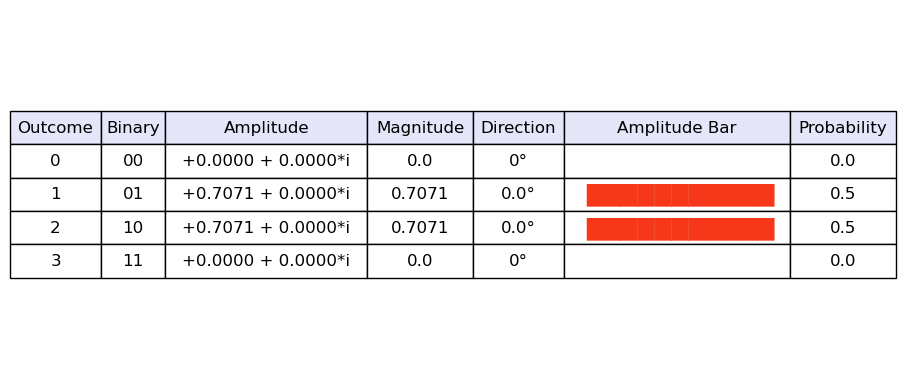

In [70]:
show_state_table(state)